# Layout

   - We do a preliminary analysis of our data and find: 

    - **problem 1**: one of the classes is more significant than the rest. 

    - **problem 2**: we have many outliers
    

   - To study **problem 1** we will apply the **supervised learning models** seen in class: 

    - Decision Trees + Random Forest (related)
    - SVM  
    - k-Nearest Neighbours 
    - Naïve Bayes 
    - Linear Regression 
    - *NOT* perceptron since we are going to use NN later

    **Premise**: how does PCA and standardisation affect the accuracy of the classifying models. 
    

   - To study **problem 2** we will apply the **unsupervised learning models** seen in class: 

    - K-means 
    - GMM

    **Premise**: GMM should a priori fix the problem of the difference in class sizes. 



   - After we have optimized our models, we compare these models' performances with a **Neural Network**: 

    **Premise**: Neural Networks should allow a higher accuracy score than the supervised and unsupervised learning models. 


   - Ways of cleaning data: 

    - PCA
    - standardisation 
    - normalisation


   - Ways of evaluating models: 

    - confusion matrices
    - accuracy score
    - associated plots 

# First analysis

We import useful packages

In [47]:
#basics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.decomposition import PCA

#supervised learning 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

We import the data 

In [5]:
path = "/Users/erikgutierrezduthiers/Desktop/MSc AI/CW_Intro_AI/data/"
filename = "CTG.xls"

df = pd.read_excel(path+filename, sheet_name = "Data",header=1)
df = df.reindex(np.random.permutation(df.index))
df.head()
# shape: (891, 12) assdsd

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
1529,2161,3337,2,0,7,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
368,0,364,0,3,1,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,1,NaN,10,NaN,2
954,1864,2859,0,0,7,4,0,0,0,NaN,...,-1,-1,1,-1,-1,-1,NaN,7,NaN,1
639,273,1173,4,15,0,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
731,799,1165,3,11,2,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,4,NaN,1


**Data description**:

* 2126 fetal cardiotocograms (CTGs).
* CTGs classified by: 
    * morphologic pattern (A, B, C....) - 10-class experiment
    * fetal state (N, S, P) - 3-class experiment

In [6]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

#Prepare X and y
X = df[columns]
y1 = df["NSP"]
y2 = df["CLASS"]
X.head()



,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1529,133,2,0,7,0,0,0,40,0.9,21,...,50,106,156,3,0,142,140,142,3,1
368,133,0,3,1,0,0,0,61,0.5,4,...,16,128,144,1,0,135,135,136,0,0
954,136,0,0,7,4,0,0,35,1.1,0,...,86,69,155,3,0,136,133,137,14,1
639,138,4,15,0,0,0,0,42,1.0,0,...,115,71,186,5,0,144,143,144,6,0
731,120,3,11,2,0,0,0,45,0.8,0,...,44,116,160,2,0,153,142,147,27,1


If the values of the features are closer to each other we improve the algorithm's training and performance. 

Why? 

If the difference betwenn the value of the features is high, it will take the model more time to understand the data and the accuracy will be lower.  Larger differences between the data points of input variables increase the uncertainty in the results of the model. 

We Standardize features by removing the mean and scaling to variance = 1.

The standard score of a sample x is calculated as:

z = (x - u) / s

where: 
- x: data point 
- u: mean of our sample data 
- s: standard variation

In [34]:
# Apply the standar scaler to features

sc = StandardScaler()

sc.fit(X)
X_std = pd.DataFrame(sc.transform(X),columns=columns)
X_std.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,-0.030884,-0.202944,-0.195096,1.173429,-0.628375,-0.057476,-0.27153,-0.406668,-0.490111,0.606405,...,-0.524974,0.420275,-0.447348,-0.362263,-0.458444,0.277698,0.345702,0.270320,-0.545656,1.112980
1,-0.030884,-0.764740,-0.114270,-0.934480,-0.628375,-0.057476,-0.27153,0.815060,-0.943095,-0.317882,...,-1.397966,1.164694,-1.116245,-1.040530,-0.458444,-0.149720,0.024982,-0.144526,-0.649208,-0.524526
2,0.274039,-0.764740,-0.195096,1.173429,0.972495,-0.057476,-0.27153,-0.697556,-0.263619,-0.535361,...,0.399370,-0.831702,-0.503089,-0.362263,-0.458444,-0.088660,-0.103306,-0.075385,-0.165963,1.112980
3,0.477322,0.358852,0.209036,-1.285798,-0.628375,-0.057476,-0.27153,-0.290313,-0.376865,-0.535361,...,1.143981,-0.764027,1.224897,0.316003,-0.458444,0.399817,0.538134,0.408602,-0.442103,-0.524526
4,-1.352220,0.077954,0.101267,-0.583161,-0.628375,-0.057476,-0.27153,-0.115780,-0.603357,-0.535361,...,-0.679031,0.758648,-0.224382,-0.701397,-0.458444,0.949354,0.473990,0.616025,0.282764,1.112980


We visualize the scaled data using boxplot: 

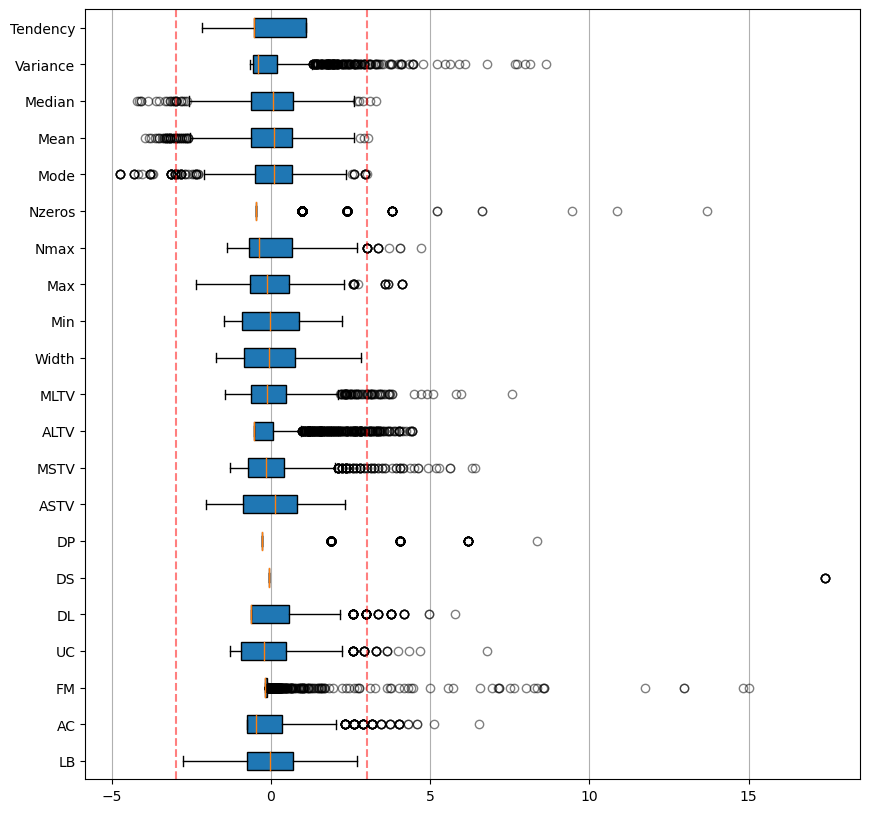

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

bp = plt.boxplot(X_st,labels=columns,vert=0,patch_artist = True)

ax.axvline(3, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(-3, c = "red", linestyle="--", alpha = 0.5)


plt.gca().xaxis.grid(True)

# source for aestetic improvements: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
for dot in bp['fliers']:
    dot.set(marker ='o',
              color ='lightgrey',
              alpha = 0.5)
    

We have a lot of outliers deviating the mean of our features. This is a problem we must consider. 

# Supervised Learning Models


**Premise**: how does PCA and standardisation affect the accuracy of the classifying models?

*Notes*: when using the PCA:

- for raw data use 3 components
- for scaled data use 10 components 

In [26]:
# Split in train and test dataset (with and without Standard Scaler application)

# Raw data
X_train, X_test, y_train, y_test = train_test_split(X, y1, train_size=0.8,random_state=35)

# Scaled data
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y1, train_size=0.8,random_state=35)


## Decision Tree and Random Forest 

Let's apply the **Decision Tree Classifier**

In [13]:
dt = DecisionTreeClassifier(random_state=35)

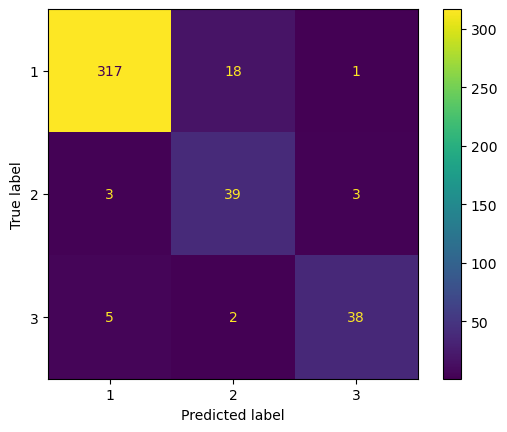

In [35]:
# Raw data
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_);
disp.plot();

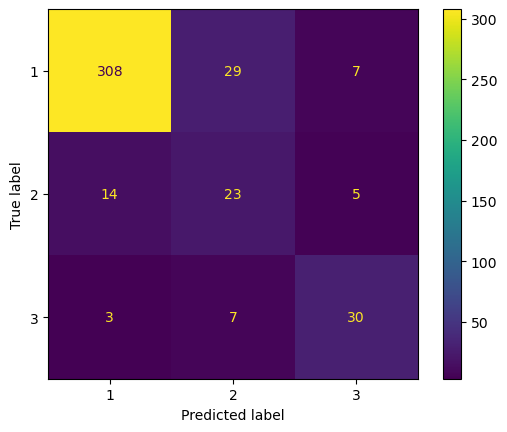

In [44]:
# Scaled data
dt.fit(X_train_std,y_train_std)
y_pred_std = dt.predict(X_test_std)

cm = confusion_matrix(y_pred_std, y_test)

disp_st = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp_st.plot();

In [38]:
print("Decision Tree accuracy: %.2f" % accuracy_score(y_pred,y_test) )
print("Decision Tree accuracy with Standard Scalar: %.2f" % accuracy_score(y_pred_std,y_test_std) )

Decision Tree accuracy: 0.92
Decision Tree accuracy with Standard Scalar: 0.92


Let's apply the **Random Forest Classifier** 

In [48]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy")

Let's apply PCA 

In [31]:
print(X.shape)
print(X_std.shape)


(2126, 21)
(2126, 21)


In [45]:
# Raw data
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

print(X_pca.shape)

# Scaled data
pca_std = PCA(n_components=10)
pca_std.fit(X_std)
X_pca_std = pca_std.transform(X_std)

print(X_pca_std.shape)

(2126, 3)
(2126, 10)


In [46]:
#training and testing dataset

# Raw data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y1, train_size=0.8,random_state=35)
dt.fit(X_train,y_train)
y_pred_std = dt.predict(X_test)

print("Decision Tree accuracy: %.2f" % accuracy_score(y_pred,y_test) )

# Scaled data: 
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_pca_std, y1, train_size=0.8,random_state=35)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy with Standard Scalar: %.2f" % accuracy_score(y_pred_std,y_test_std) )

Decision Tree accuracy: 0.83
Decision Tree accuracy with Standard Scalar: 0.83


### Observations

- Data standardization has no effect on the decision tree accuracy score 

## SVM  

## K-Nearest Neighbours

## Naïve Bayes 

In [ ]:
print('hello')